# The goal of this example is to perform exploratory data analysis on employees dataset
#### Provided credit <a href="https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/?ref=lbp">geeksforgeeks</a>
##### Exploratory data analysis involves multiple steps
##### 1. Data cleaning - clean the data for any issues, handling missing values, handling outliers etc
##### 2. Data statistical analysis for identifying the data, its statistical values and ranges
##### 3. Data visualization to see the statistics visually using various kinds of graphs
##### 4. Feature engineering involves feature analysis,selection, transformation etc using techniques like scaling, normalization, binning, encoding
##### 5. Data correlation to identify relatishionships and patterns
##### 6. Data segmentation to analyze groups of data and study their traits
##### 7. Data Quality analysis for identify the quality of data

In [110]:
import pandas as pd
import numpy as np

#### Data observation and statistical analysis 
<font color=green>look at the data to see the structure. it has multiple categorical and numerical fields. it has 1000 records with 8 features</font>


In [111]:
df = pd.read_csv('datasets/employees.csv')
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [112]:
df.shape

(1000, 8)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


<font color=green>
    looking at the statistical values of numerical the data tells us information salary and bonus field, 
    what the average value is and where the 25% quartile, 50th and 75% quartile values are along with min and max values
</font>

In [114]:
df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


<font color=green>Next we look at the unique values for each feature. it tells us how many unique employee names and how many unique teams are there</font>

In [115]:
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

#### Data cleaning - handling missing values
<font color="green">
    <ul>
        <li>Look for missing(NA) or null values in column</li>
        <li>Eg: Gender colum has lot of missing values while bonus column has no missing values</li>
        <li>Fill gender column with missing values as 'No Gender'</li>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html">Refer pandas.DataFrame.fillna</a>
        <li>After filling NA values there are 3 uniue values in gender feature</li>
        <li>Perform imputation on senior management column - filling with middle value</li>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html">Refer pandas.DataFrame.replace</a>
        <li>First Name  field has 67 missing values and team has 43. This cannot be replaced using previous techniques. Hence drop those records</li>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">Refer pandas.DataFrame.dropna</a>
</font>

In [116]:
df.isna().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [117]:
df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [118]:
df.Gender.fillna('No Gender', inplace = True)
df.isna().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [119]:
df.Gender.unique()

array(['Male', 'Female', 'No Gender'], dtype=object)

In [120]:
mode = df['Senior Management'].mode()[0]
df['Senior Management'].replace(np.nan, mode,inplace=True)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [121]:
df['Senior Management'].unique()

array([ True, False])

In [122]:
df2 = pd.DataFrame(df.dropna(subset = ['First Name','Team']))
df2.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [123]:

df2.shape

(899, 8)

In [124]:
df2.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal


#### Feature Engineering - Data encoding
<font color="green">
    <ul>
        <li>Many algorithms does not support using categorical values in their columns</li>
        <li>We can convert categorical value to numerical value using encoding techniques</li>
        <li>We can use Label encoding from sklearn for converting Gender column to numerical value</li>
</font>

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le = LabelEncoder()
df2['Gender'] = le.fit_transform(df2['Gender'])
le.classes_

array(['Female', 'Male', 'No Gender'], dtype=object)

In [127]:
df2.Gender.unique()

array([1, 0, 2])

In [128]:
le2 = LabelEncoder()
df2['Senior Management'] = le2.fit_transform(df2['Senior Management'])
le2.classes_

array([False,  True])

In [129]:
df2['Senior Management'].unique()

array([1, 0])

In [130]:
le3 = LabelEncoder()
df2['Team'] = le3.fit_transform(df2['Team'])
le3.classes_

array(['Business Development', 'Client Services', 'Distribution',
       'Engineering', 'Finance', 'Human Resources', 'Legal', 'Marketing',
       'Product', 'Sales'], dtype=object)

In [131]:
df2['Team'].unique()

array([7, 4, 1, 6, 8, 3, 0, 5, 9, 2])

In [132]:
df2.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,1,8/6/1993,12:42 PM,97308,6.945,1,7
2,Maria,0,4/23/1993,11:17 AM,130590,11.858,0,4
3,Jerry,1,3/4/2005,1:00 PM,138705,9.340,1,4
4,Larry,1,1/24/1998,4:47 PM,101004,1.389,1,1
5,Dennis,1,4/18/1987,1:35 AM,115163,10.125,0,6


#### Data visualization
<font color="green">
    <ul>
        <li>Visualize the data for better understanding of trends and patterns</li>
        <li>We can use matplotlib and seaborn for data visualization</li>
        <li>A univariate analysis of salary using histogram to understand how many people have a given salary group. Most of the people have a salary in the 100k range</li>
        <li>A bivariate analysis of salary and teams salary range using box plot. This tells us about salary range of people in different departments. The highest salary is from Engineering deparment. Marketing and business development has the widest range in terms of salary paid</li>
        <li>A bivariate analysis of salary and teams against gender using scatter plot. It shows lowest salary is paid to women in Engineering department</li>
        <li>A multivariate analysis using pair plot to compare all features. </li>
</font>

In [133]:
import seaborn as sbn
import matplotlib.pyplot as plt

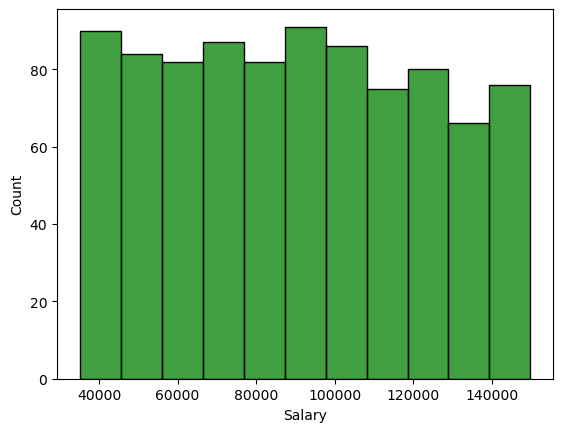

In [134]:
sbn.histplot(data = df2, x = 'Salary', color ='green')
plt.show()

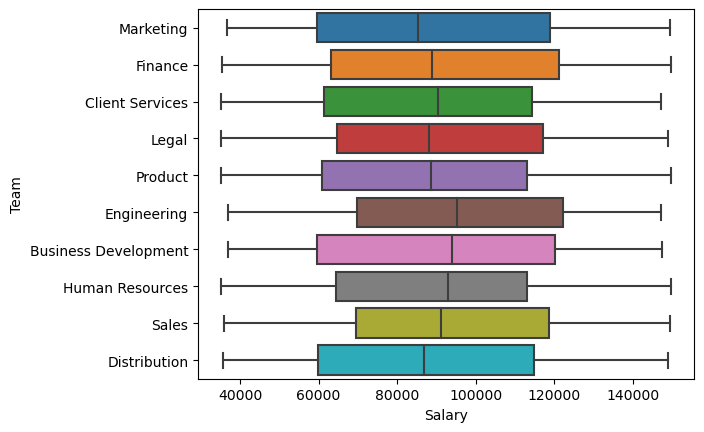

In [135]:
sbn.boxplot(x='Salary', y = 'Team', data = df)
plt.show()

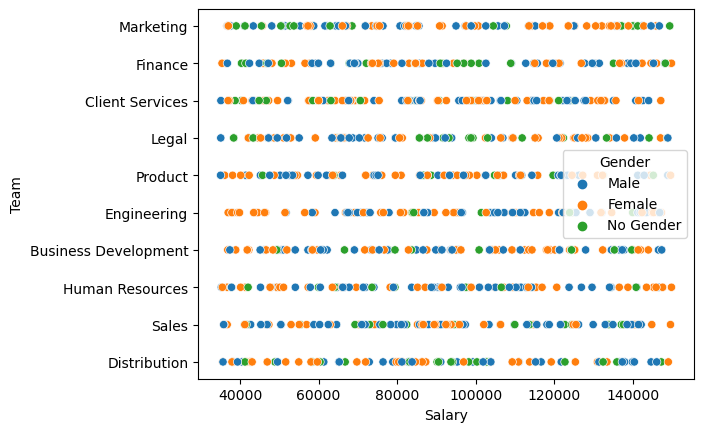

In [136]:
sbn.scatterplot(x='Salary', y = 'Team', hue = 'Gender' , legend = 'full', data = df)
plt.show()

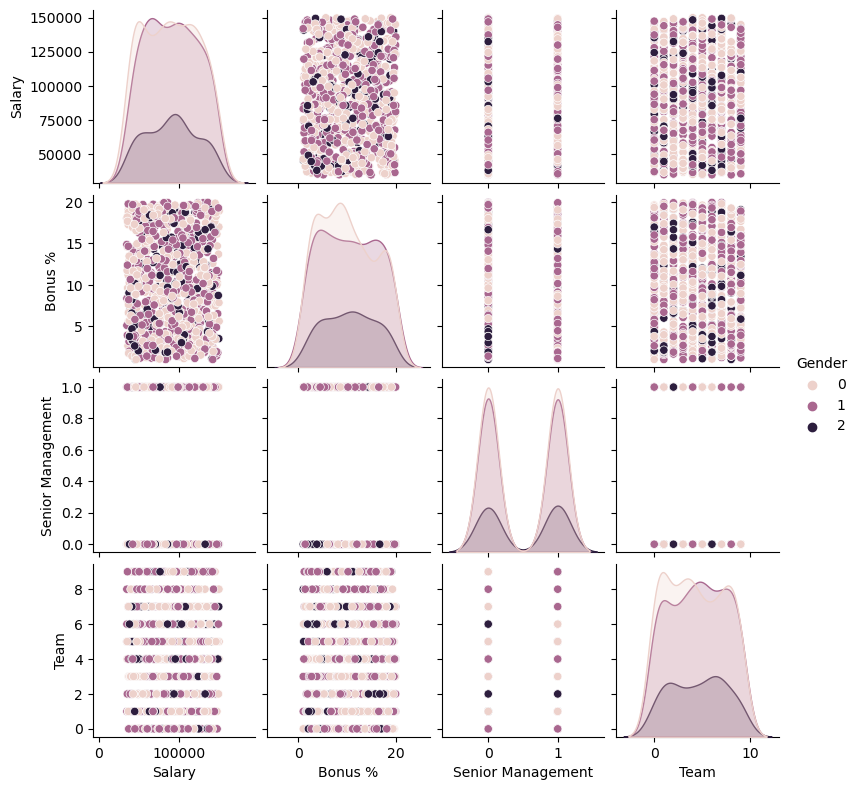

In [137]:
sbn.pairplot(df2[['Start Date','Salary','Bonus %','Gender', 'Senior Management', 'Team']],hue='Gender', height = 2)
plt.show()

#### Handling outliers
<font color="green">
    <ul>
        <li>An outlier is a value that lies outside the usual range may be caused by data capture or other errors</li>
        <li>We can look at iris dataset to analyze this.</li>
        <li>A boxplot of feature SepalWidthCm shows dotted outlier values outside of the normal range.</li>
        <li>We need to remove these outlier records. We can use InterQuartileRange(IQR) method to remove outliers.</li>
        <li>In IQR we find 25th and 75th quartile values and drop all records which are outside this range for that feature</li>
</font>

In [152]:
df = pd.read_csv('datasets/iris/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


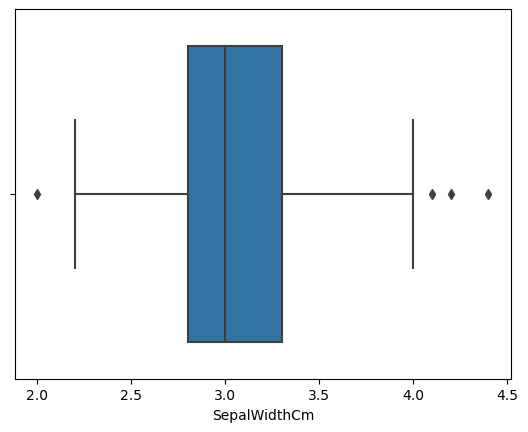

In [153]:
sbn.boxplot(data = df,x='SepalWidthCm' )
plt.show()

In [154]:
df.shape

(150, 6)

In [155]:
import numpy as np

In [156]:
q_25 = np.percentile(df['SepalWidthCm'],25, interpolation = 'midpoint')
q_75 = np.percentile(df['SepalWidthCm'],75, interpolation = 'midpoint')
iqr = q_75 - q_25
records_above_upperbound = np.where(df['SepalWidthCm'] > (q_75 + 1.5* iqr))
records_below_lowerbound = np.where(df['SepalWidthCm'] < (q_25 - 1.5* iqr))
print(records_above_upperbound)
print(records_above_upperbound[0])
print(records_below_lowerbound)
print(records_below_lowerbound[0])

(array([15, 32, 33]),)
[15 32 33]
(array([60]),)
[60]


In [157]:
df.drop(records_above_upperbound[0],inplace=True)
df.drop(records_below_lowerbound[0],inplace=True)

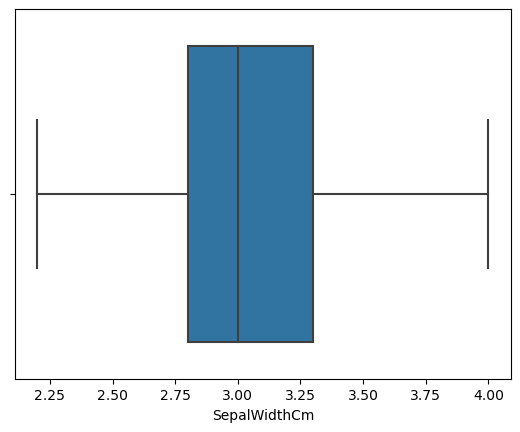

In [158]:
sbn.boxplot(data = df,x='SepalWidthCm' )
plt.show()

In [159]:
df.shape

(146, 6)